## library Imports

In [2]:
import scipy as sp
from scipy import fft
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [4]:
#code
ECG_sig = np.loadtxt("ECG_800hz.txt")
#print(ECG_sig) #check the correct variable assignment
#print(ECG_sig.shape,"\n")

# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

(array([   438,    439,    440, ..., 349998, 349999, 350000], dtype=int64),)
(array([    0,     1,     2, ..., 34998, 34999, 35000], dtype=int64),)


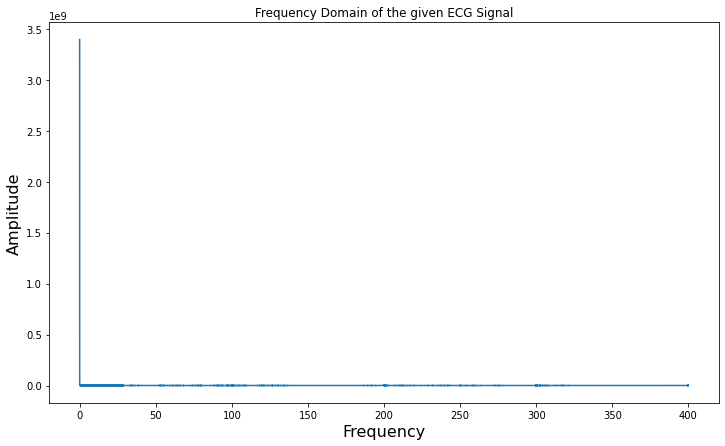

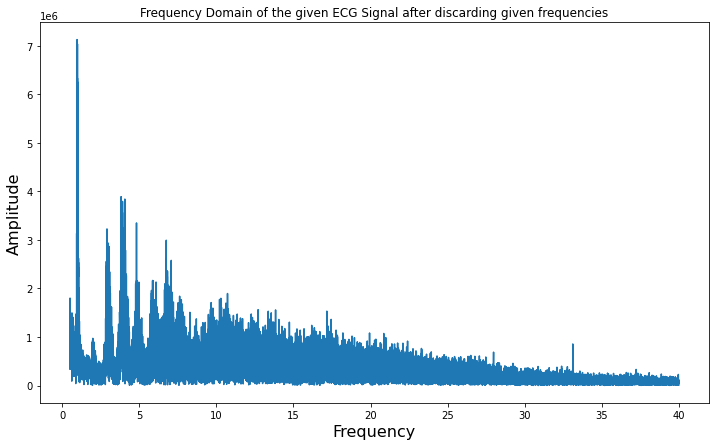

In [3]:
#code
# code
Fs=800
sig_len=len(ECG_sig)
##
fy=sp.fft.rfft(ECG_sig)
abs_fy=np.abs(fy)
##
fx=sp.fft.rfftfreq(sig_len,1/Fs)
##
plt.figure(figsize=(12,7))
plt.title("Frequency Domain of the given ECG Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(fx,abs_fy)

result = np.where(fx > 0.5)
print(result) #find the smallest index with the value >0.5
result = np.where(fx < 40)
print(result) #find the largest index with the value <40

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of the given ECG Signal after discarding given frequencies")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(fx[438:35000],abs_fy[438:35000])

# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

C:\Users\Iva\AppData\Local\Temp/ipykernel_20376/2435973115.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w4, 20 * np.log10(abs(h4)))


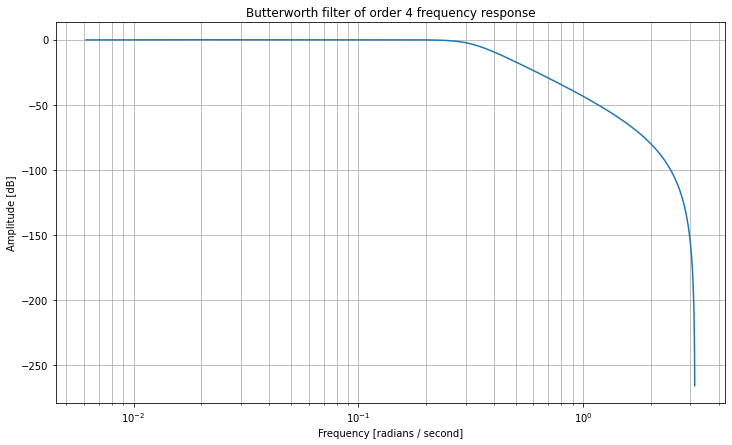

C:\Users\Iva\AppData\Local\Temp/ipykernel_20376/2435973115.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w2, 20 * np.log10(abs(h2)))


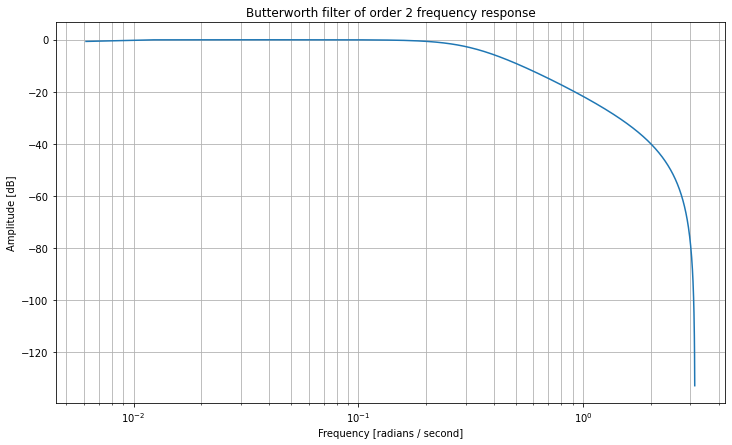

In [4]:
#code
#Butterworth filter of order 4
b4, a4 = sp.signal.butter(4, [0.5,40.0], btype='bandpass', output='ba', fs=800)
#Butterworth filter of order 2
b2, a2 = sp.signal.butter(2, [0.5,40.0], btype='bandpass', output='ba', fs=800)
#freqz
w4,h4 = sp.signal.freqz(b4, a4)
w2,h2 = sp.signal.freqz(b2, a2)

#plot for bw order 4
plt.figure(figsize=(12,7))
plt.semilogx(w4, 20 * np.log10(abs(h4)))
plt.title('Butterworth filter of order 4 frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
#plt.axvline(100, color='green') # cutoff frequency
plt.show()

#plot for bw order 2
plt.figure(figsize=(12,7))
plt.semilogx(w2, 20 * np.log10(abs(h2)))
plt.title('Butterworth filter of order 2 frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
#plt.axvline(100, color='green') # cutoff frequency
plt.show()

## Observations:

We can notice a much greater attenuation when designing a Butterworth filter of order 4 when comparing it to one of order 2, even though the characteristic is the same. 

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

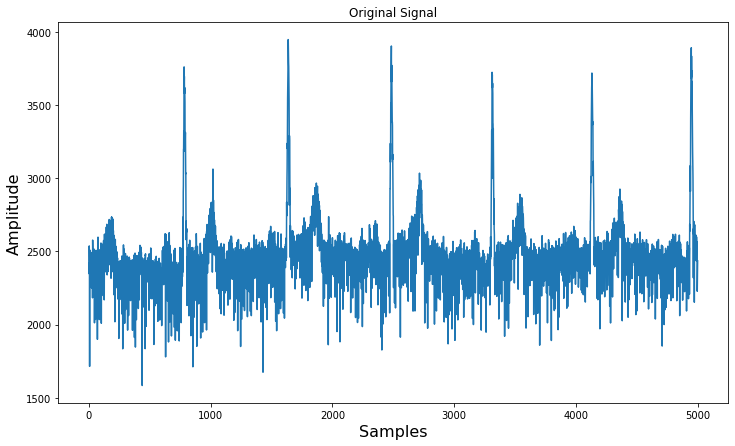

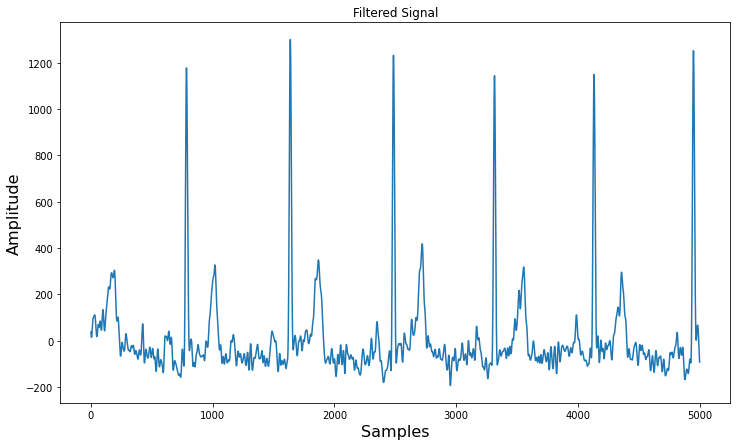

In [5]:

#creating 5000 equally spaced samples
t = np.linspace(0, 5000, 5000) 

#apply the previously designed Butterworth filter of order 4 to our signal
output_ECG = signal.filtfilt(b4, a4, ECG_sig)

#plot for the original signal
plt.figure(figsize=(12,7))
plt.title("Original Signal")
plt.xlabel("Samples",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(t,ECG_sig[:5000])

#plot for the filtered signal
plt.figure(figsize=(12,7))
plt.title("Filtered Signal")
plt.xlabel("Samples",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(t,output_ECG[:5000])

## Observations:

Filtering helps us remove the noise of the signal and observe the ECG better. This can help us observe much easier any irregularities in the colected sample, which might show us a problem with our subject. 

The noise is probably due to the corruption from 60 Hz interference and we are filtering it out with the band pass filter, that only allows a certain range of frequencies to come through.

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

(array([    0,     1,     2, ..., 43748, 43749, 43750], dtype=int64),)


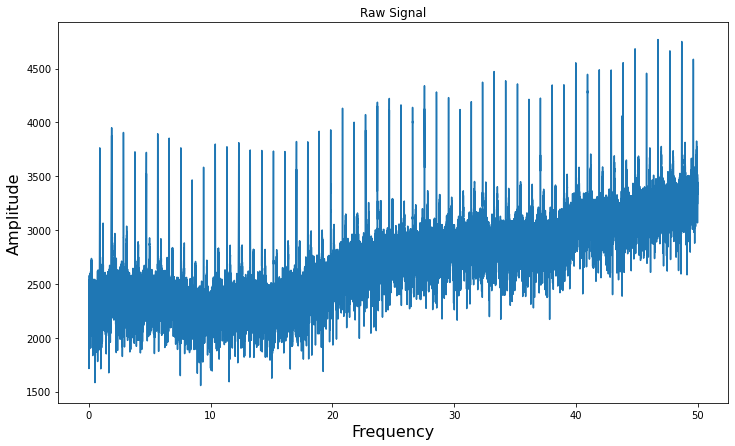

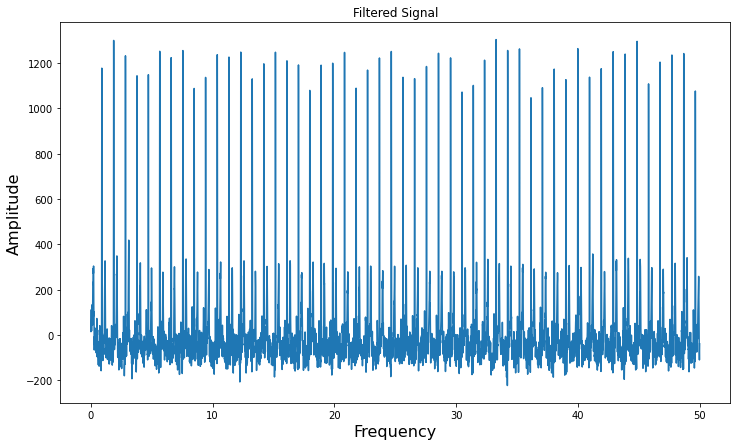

In [6]:
#code

result = np.where(fx < 50)
print(result) #find the largest index with the value <50

#plot for raw signal
plt.figure(figsize=(12,7))
plt.title("Raw Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(fx[:43750],ECG_sig[:43750])

#plot for filtered signal
plt.figure(figsize=(12,7))
plt.title("Filtered Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(fx[:43750],output_ECG[:43750])

## Observations:

Filtering helps us remove the noise of the signal and observe the ECG better. 

This can help us observe much easier any irregularities in the colected sample, which might show us a problem with our subject. The noise is probably due to the corruption from 60 Hz interference and we are filtering it out with the band pass filter, that only allows a certain range of frequencies to come through.

Because Butterworth gives us a frequency response as flat as possible, it is no surprise that the original signal that appears to have an ascending plot transformes into a seemngly flat graphic reprezentation after filtering and plotting in the frequency domain.

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


In [7]:
#still need to locally install biosppy
#code
#!pip install biosppy
import biosppy 
from biosppy.signals import ecg 

print("\nPeak detection test for the first 5000 samples")
#checking for the first 5000 samples (we expect 6 detected peaks as seen in the visual representation)
print(biosppy.signals.ecg.hamilton_segmenter(output_ECG[:5000],sampling_rate=800.0))

print("\nDetected peak locations for the entire filtered signal")
print(biosppy.signals.ecg.hamilton_segmenter(output_ECG,sampling_rate=800.0))


Peak detection test for the first 5000 samples
ReturnTuple(rpeaks=array([ 785, 1638, 2485, 3315, 4132, 4949]))

Detected peak locations for the entire filtered signal
ReturnTuple(rpeaks=array([   785,   1638,   2485,   3315,   4132,   4949,   5771,   6610,
         7423,   8244,   9084,   9923,  10772,  11597,  12430,  13264,
        14091,  14919,  15731,  16546,  17379,  18229,  19061,  19884,
        20738,  21591,  22431,  23265,  24119,  24983,  25850,  26674,
        27485,  28294,  29123,  29954,  30802,  31629,  32452,  33299,
        34139,  34993,  35837,  36681,  37538,  38397,  39255,  40080,
        40903,  41759,  42609,  43442,  44265,  45108,  45962,  46784,
        47630,  48477,  49303,  50142,  50987,  51799,  52605,  53436,
        54260,  55061,  55835,  56632,  57433,  58223,  58995,  59793,
        60612,  61416,  62204,  63009,  63806,  64589,  65376,  66195,
        67024,  67845,  68665,  69498,  70322,  71121,  71924,  72747,
        73543,  74336,  75115,  

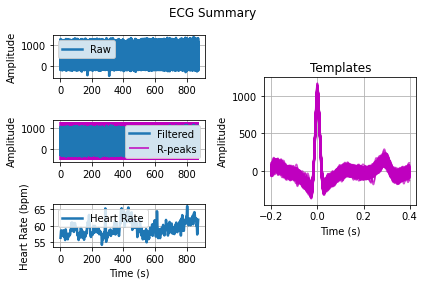

ReturnTuple(ts=array([0.0000000e+00, 1.2500000e-03, 2.5000000e-03, ..., 8.7499750e+02,
       8.7499875e+02, 8.7500000e+02]), filtered=array([  1.56219884,  -5.19160034, -11.41798364, ..., -43.85080411,
       -22.9130092 ,  -1.02970049]), rpeaks=array([   785,   1638,   2485,   3315,   4132,   4949,   5771,   6610,
         7423,   8243,   9084,   9923,  10772,  11597,  12430,  13264,
        14091,  14920,  15731,  16546,  17379,  18229,  19061,  19884,
        20738,  21591,  22431,  23265,  24119,  24983,  25850,  26674,
        27485,  28294,  29123,  29954,  30802,  31629,  32452,  33299,
        34139,  34993,  35837,  36681,  37538,  38397,  39255,  40080,
        40903,  41759,  42609,  43442,  44265,  45108,  45962,  46784,
        47630,  48477,  49303,  50142,  50987,  51799,  52605,  53436,
        54260,  55061,  55835,  56632,  57433,  58223,  58995,  59793,
        60613,  61416,  62204,  63009,  63807,  64589,  65376,  66195,
        67024,  67845,  68665,  69498,  703

In [8]:
biosppy.signals.ecg.ecg(output_ECG,sampling_rate=800.0) 

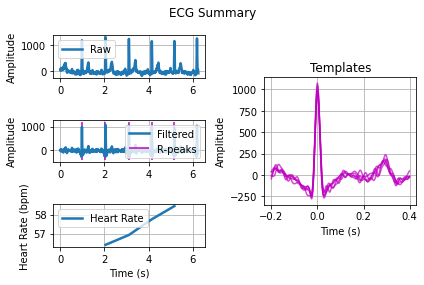

ReturnTuple(ts=array([0.00000e+00, 1.25000e-03, 2.50000e-03, ..., 6.24625e+00,
       6.24750e+00, 6.24875e+00]), filtered=array([  1.56219884,  -5.19160034, -11.41798364, ...,  -0.68687808,
        -2.34919538,  -3.90004113]), rpeaks=array([ 785, 1638, 2485, 3315, 4132]), templates_ts=array([-2.00000000e-01, -1.98750000e-01, -1.97500000e-01, -1.96250000e-01,
       -1.95000000e-01, -1.93750000e-01, -1.92500000e-01, -1.91250000e-01,
       -1.90000000e-01, -1.88750000e-01, -1.87500000e-01, -1.86250000e-01,
       -1.85000000e-01, -1.83750000e-01, -1.82500000e-01, -1.81250000e-01,
       -1.80000000e-01, -1.78750000e-01, -1.77500000e-01, -1.76250000e-01,
       -1.75000000e-01, -1.73750000e-01, -1.72500000e-01, -1.71250000e-01,
       -1.70000000e-01, -1.68750000e-01, -1.67500000e-01, -1.66250000e-01,
       -1.65000000e-01, -1.63750000e-01, -1.62500000e-01, -1.61250000e-01,
       -1.60000000e-01, -1.58750000e-01, -1.57500000e-01, -1.56250000e-01,
       -1.55000000e-01, -1.53750000e-0

In [9]:
biosppy.signals.ecg.ecg(output_ECG[:5000],sampling_rate=800.0) 

## Observations:

Since we had an easy to count representation of the signal in the "Apply filter to ECG_Sig" part of this excercise, we used the Hamilton function for that signal in order to easily check that our output is correct. 

After running the "QRS Detection" segment, we observed that our output was a tuple that consisted of six values which were R-peak location indices. This number corresponds to the number of spikes in the filtred and truncated signal. 

After this, we used the function also for the entire signal, in order to obtain all the R-peak location indices.